# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18935681,
            "total_supply": 18935681,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 40220.0,
                    "volume_24h": 24934952652,
                    "market_cap": 761676171971,
                    "percentage_change_1h": 1.32165580339251,
                    "percentage_change_24h": -4.42119719324862,
                    "percentage_change_7d": -5.60492376829847,
                    "percent_change_1h": 1.32165580339251,
                    "percent_change_24h": -4.42119719324862,
                    "percent_change_7d": -5.60492376829847
                },
                "CAD": {
                    "price": 50339.352,
                    "volume_24h": 31208586739.2432,
                    "m

In [6]:
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

40220.0

In [7]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119245520,
            "total_supply": 119245520,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2940.52,
                    "volume_24h": 16043322622,
                    "market_cap": 352247716306,
                    "percentage_change_1h": 0.877060190655067,
                    "percentage_change_24h": -6.11702970656008,
                    "percentage_change_7d": -9.71019845029018,
                    "percent_change_1h": 0.877060190655067,
                    "percent_change_24h": -6.11702970656008,
                    "percent_change_7d": -9.71019845029018
                },
                "CAD": {
                    "price": 3680.354832,
                    "volume_24h": 20079822593.6952,
               

In [8]:
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

2940.52

In [9]:
# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48264.00
The current value of your 5.3 ETH is $15584.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2022-01-14 00:00:00-05:00  112.53  112.545  112.15  112.17  8362916  461.19   

                                                            
                             high    low   close    volume  
time                                                        
2022-01-14 00:00:00-05:00  465.09  459.9  464.68  84363989

In [13]:
# Pick AGG and SPY close prices

df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,AGG,SPY
2022-01-14,112.17,464.68


In [14]:
agg_close_price = df_closing_prices["AGG"][0]
agg_close_price

112.17

In [15]:
spy_close_price = df_closing_prices["SPY"][0]
spy_close_price

464.68

In [16]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.17
Current SPY closing price: $464.68


In [17]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23234.00
The current value of your 200 AGG shares is $22434.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets = ['crypto', 'shares']
values = {'amount' : [my_btc_value + my_eth_value, my_spy_value + my_agg_value]}


# Create savings DataFrame
df_savings = pd.DataFrame(values, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,63848.756
shares,45668.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

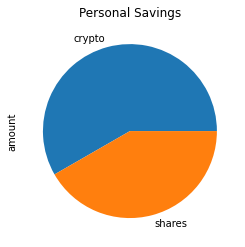

In [19]:
# Plot savings pie chart
df_savings["amount"].plot(kind='pie', title="Personal Savings")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [21]:
# Calculate total amount of savings

total_savings = sum(df_savings["amount"])
total_savings

109516.756

In [22]:
# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal amount!")
else:
    print(f"You need {emergency_fund - total_savings} to reach your emergency fund goal amount.")

Congratulations! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [26]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patrickthornquist/FinTech/Practice/ASU-TEM-VIRT-FIN-PT-12-2021-U-C/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008222,0.994327,1.003711,1.011615,0.989020,1.006272,0.998550,0.999709,1.002706,1.004027,...,1.025652,0.999943,1.001073,1.013314,1.015948,1.006957,1.005510,1.010582,0.996371,1.000429
2,1.013249,1.003899,0.998447,1.013571,0.988797,0.991893,0.999325,0.997769,1.003791,1.003897,...,1.024428,0.987339,1.007480,1.016609,1.020774,1.013844,1.018060,1.008082,0.998192,1.011008
3,1.019129,1.012772,1.008340,1.019726,0.988196,0.996389,1.000953,1.005327,1.005501,1.006997,...,1.024369,0.984192,1.010199,1.023068,1.007793,1.026459,1.017049,1.002184,0.992058,1.013058
4,1.019682,1.001756,1.008798,1.031912,0.982703,0.999402,0.991898,1.022049,0.999519,0.993558,...,1.038139,0.982891,1.010242,1.024275,0.994642,1.028567,1.011647,1.018235,1.000073,1.011660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27.570388,26.182503,35.418479,2.979546,19.321862,17.370156,19.927080,14.437292,13.683884,24.322855,...,15.697282,16.534680,10.497476,3.736977,4.030512,12.152450,15.384917,9.731084,39.095304,7.260850
7557,27.738161,25.995670,35.376492,3.006376,19.504119,17.239023,20.013653,14.523430,13.733533,24.344537,...,15.756138,16.595196,10.470400,3.722425,4.021175,12.065170,15.367726,9.784574,39.396037,7.292952
7558,27.831771,25.866497,35.200508,2.999208,19.495977,17.151559,20.022715,14.368881,13.870385,24.129035,...,15.624247,16.431429,10.459533,3.707128,3.970043,12.242128,15.231671,9.784051,39.519110,7.282179
7559,27.968230,25.864595,34.971704,3.019132,19.364212,17.242958,19.868240,14.495829,13.792912,24.132211,...,15.598365,16.488715,10.494728,3.682002,3.954194,12.172200,15.310465,9.804915,40.196290,7.341476


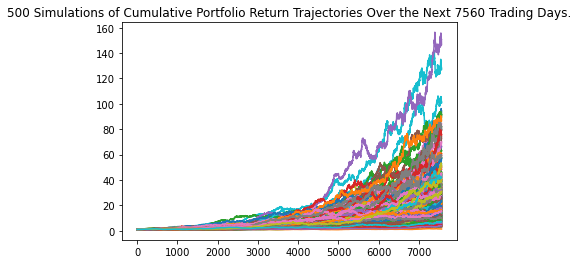

In [28]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

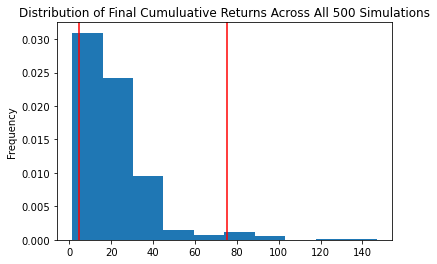

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             21.937756
std              17.230022
min               1.360427
25%              11.131979
50%              17.393219
75%              27.425182
max             146.755742
95% CI Lower      4.462276
95% CI Upper     75.107618
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89245.51 and $1502152.36


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133868.27 and $2253228.54


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patrickthornquist/FinTech/Practice/ASU-TEM-VIRT-FIN-PT-12-2021-U-C/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002048,1.005827,0.994093,1.007893,0.998706,1.015249,1.014221,1.000997,0.998905,1.000239,...,1.002736,1.010106,1.002031,0.996724,1.004866,1.000665,1.017610,1.005950,0.999308,0.998293
2,1.000679,1.001329,0.989157,1.024272,1.001308,1.016392,1.015142,1.004447,0.992671,1.005680,...,1.010549,1.002534,1.010296,0.996522,1.011865,0.989055,1.022413,1.015759,0.993965,0.997283
3,1.009961,0.996328,0.974949,1.021943,1.006522,1.008557,1.018873,0.987263,0.991634,1.000384,...,1.003859,1.010144,1.007521,1.004275,1.011185,0.992725,1.021437,1.029501,0.997131,0.986977
4,1.007099,0.999895,0.965534,1.031144,1.016467,1.011762,1.010933,0.977673,1.002605,1.006648,...,1.002314,1.001597,1.007372,1.001851,1.037727,1.015901,1.018733,1.020057,0.992386,0.988296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.010464,1.947449,0.404301,1.467053,2.779161,2.310781,1.859457,1.600423,0.890284,2.088345,...,1.754527,1.898532,1.661621,1.896008,1.874656,1.531825,1.883130,1.750780,1.352402,1.720796
1257,2.022747,1.940152,0.400852,1.451244,2.784191,2.313360,1.884646,1.592527,0.879830,2.080785,...,1.771735,1.873104,1.654563,1.921921,1.872165,1.527000,1.884946,1.752603,1.346569,1.715411
1258,2.020725,1.946049,0.401088,1.456246,2.795964,2.314017,1.895813,1.599617,0.871913,2.084682,...,1.789389,1.888542,1.649522,1.939422,1.876600,1.507757,1.848946,1.750836,1.349363,1.715356
1259,2.042356,1.952242,0.406585,1.458694,2.797615,2.334027,1.877089,1.593874,0.873227,2.107466,...,1.780846,1.905751,1.645985,1.952680,1.872186,1.487351,1.846354,1.755139,1.364954,1.724528


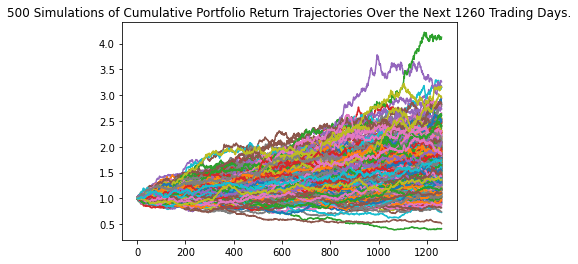

In [35]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

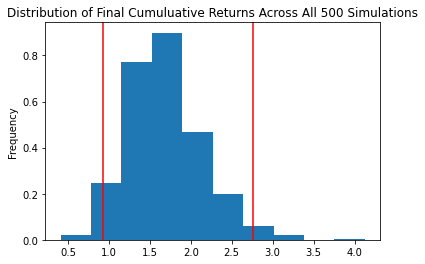

In [36]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
five_tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(five_tbl)

count           500.000000
mean              1.686125
std               0.464089
min               0.409776
25%               1.359603
50%               1.653111
75%               1.938975
max               4.125435
95% CI Lower      0.924375
95% CI Upper      2.763168
Name: 1260, dtype: float64


In [38]:
# Set initial investment
fiveyear_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_tbl[8] * fiveyear_initial_investment,2)
ci_upper_five = round(five_tbl[9] * fiveyear_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${fiveyear_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55462.49 and $165790.06


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patrickthornquist/FinTech/Practice/ASU-TEM-VIRT-FIN-PT-12-2021-U-C/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015882,1.009088,1.017383,0.996615,0.993196,1.001384,0.997993,1.003824,1.000599,0.989301,...,0.994845,1.001563,0.989373,0.978194,1.005267,0.978887,1.007044,0.999774,0.998313,0.992315
2,1.014657,1.011865,1.010930,1.008929,1.005007,1.001667,1.002528,1.005978,1.004533,0.984547,...,0.991168,0.987911,0.981762,0.967772,1.007351,0.985621,1.003303,1.007622,0.989151,0.990209
3,1.028375,1.010310,1.011817,1.002087,1.011606,0.998548,1.007984,1.006394,1.008493,1.000462,...,0.980920,0.999748,0.980271,0.959965,0.995413,0.995779,0.994165,1.013262,0.995113,0.979396
4,1.030303,1.008038,1.018331,1.019142,1.019318,0.987938,1.020436,0.997971,1.004381,1.001598,...,0.988311,1.003243,0.982225,0.947792,1.010032,0.988796,1.000919,1.026695,0.981401,0.983815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.914693,4.304740,4.540335,2.342946,2.224375,0.877622,2.092835,1.927784,2.788583,3.968849,...,1.510339,5.541579,5.717897,2.764920,2.234372,3.143600,2.631613,2.209080,2.171599,2.524194
2517,2.881210,4.320523,4.472586,2.337317,2.215574,0.873346,2.083363,1.949405,2.759834,3.995062,...,1.504919,5.475836,5.694999,2.769513,2.255376,3.147871,2.640914,2.207786,2.178557,2.511110
2518,2.869460,4.295475,4.537641,2.355265,2.226626,0.875217,2.071139,1.946972,2.763758,3.984487,...,1.519535,5.498649,5.732196,2.756512,2.228360,3.096949,2.658837,2.199652,2.147937,2.513768
2519,2.891728,4.293638,4.488716,2.339235,2.228194,0.885835,2.112503,1.932878,2.764336,3.993910,...,1.510514,5.513979,5.701421,2.763475,2.245580,3.101341,2.635391,2.200996,2.144252,2.553030


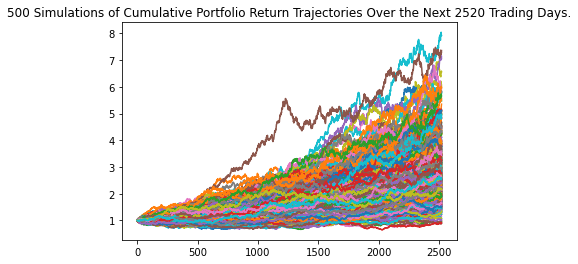

In [41]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

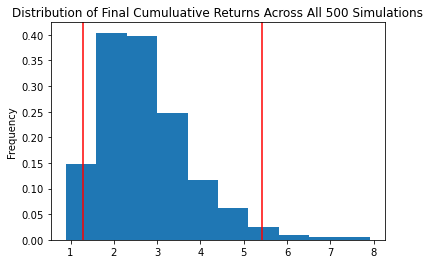

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(ten_tbl)

count           500.000000
mean              2.746952
std               1.068564
min               0.891252
25%               1.981493
50%               2.561736
75%               3.251839
max               7.918708
95% CI Lower      1.292177
95% CI Upper      5.419636
Name: 2520, dtype: float64


In [44]:
# Set initial investment
tenyear_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_tbl[8] * tenyear_initial_investment,2)
ci_upper_ten = round(ten_tbl[9] * tenyear_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${tenyear_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $77530.64 and $325178.17
